## Random Forest Model for classification

In [134]:
# import libaraies 
import pandas as pd
import numpy as np

In [159]:
train_data = pd.read_csv('E:/Linear_regression model/Dataset/train.csv')
test_data = pd.read_csv('E:/Linear_regression model/Dataset/test.csv')

In [136]:
train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [137]:
test_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
train_data.target.value_counts()

 <=50K    24720
 >50K      7841
Name: target, dtype: int64

In [25]:
train_data.info()
train_data.shape,test_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


((32561, 15), (16281, 15))

In [27]:
# checking missing values in rows 
train_null = train_data.shape[0] -train_data.dropna().shape[0]
test_null = test_data.shape[0]-test_data.dropna().shape[0]
train_null,test_null

(2399, 1221)

In [29]:
# check missing values column wise
train_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [40]:
# unique values in character type of variable
cat = train_data.select_dtypes(include=['O'])
cat.apply(pd.Series.nunique)

workclass          8
education         16
marital.status     7
occupation        14
relationship       6
race               5
sex                2
native.country    41
target             2
dtype: int64

In [160]:
# data preprossing
# impute the missing values with mode values in three colmuns

# Workclass
workclass_mode = train_data['workclass'].mode()
train_data.workclass.fillna('workclass_mode',inplace=True)

# Occupation
occupation_mode = train_data['occupation'].mode()
train_data.occupation.fillna('occupation_mode',inplace=True)

# Native country
native_country_mode = train_data['native.country'].mode()
train_data['native.country'].fillna('native_country_mode',inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [139]:
train_data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

In [140]:
test_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    274
target              0
dtype: int64

In [161]:
# preprocessing for the test data 
# imputing mode for missing values

# Workclass
workclass_test_mode = test_data['workclass'].mode()
test_data.workclass.fillna('workclass_test_mode',inplace=True)

# Occupation 
occupation_test_mode = test_data['occupation'].mode()
test_data.occupation.fillna('occupation_test_mode',inplace=True)

# Native country 
native_test_mode = test_data['native.country'].mode()
test_data['native.country'].fillna('native_test_mode',inplace=True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education.num   16281 non-null  int64 
 5   marital.status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital.gain    16281 non-null  int64 
 11  capital.loss    16281 non-null  int64 
 12  hours.per.week  16281 non-null  int64 
 13  native.country  16281 non-null  object
 14  target          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [142]:
test_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

In [143]:
# checking the proportion of class 
train_data.target.value_counts()/train_data.shape[0]

 <=50K    0.75919
 >50K     0.24081
Name: target, dtype: float64

In [97]:
# cross tab to obatain the effect of education on target
pd.crosstab(train_data.education,train_data.target, margins=True)/train_data.shape[0]

target,<=50K,>50K,All
education,,,
10th,0.026750,0.001904,0.028654
11th,0.034243,0.001843,0.036086
12th,0.012285,0.001013,0.013298
1st-4th,0.004975,0.000184,0.005160
5th-6th,0.009736,0.000491,0.010227
7th-8th,0.018611,0.001228,0.019840
9th,0.014957,0.000829,0.015786
Assoc-acdm,0.024631,0.008139,0.032769
Assoc-voc,0.031357,0.011087,0.042443


In [163]:
# load sklearn to encode all objects type variable
from sklearn import preprocessing

for x in train_data.columns:
    if train_data[x].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_data[x].values))
        train_data[x]= lbl.transform(list(train_data[x].values))

In [164]:
train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [165]:
train_data.target.value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [167]:
# load sklearn to encode all objects type variable
from sklearn import preprocessing

for x in test_data.columns:
    if test_data[x].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test_data[x].values))
        test_data[x]= lbl.transform(list(test_data[x].values))

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [168]:
target_var = train_data['target']
#train_data.drop('target',inplace=True,axis=1)

In [169]:
train_data.drop('target',inplace=True,axis=1)

In [170]:
train_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [108]:
x1= sm.add_constant(train_data)
model = sm.Logit(target_var,x1)

In [109]:
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.381796
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32546
Method:                           MLE   Df Model:                           14
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                  0.3084
Time:                        11:49:40   Log-Likelihood:                -12432.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.0285      0.199    -40.443      0.000      -8.418      -7.639
age              

In [171]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [172]:
y = target_var.values.reshape(-1,1)
x= train_data

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [173]:
model = LogisticRegression(solver='lbfgs')
result = model.fit(x,y.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
# testing accuracy on test data 
y_test = test_data['target']
test_data.drop('target',inplace=True,axis=1)

In [175]:
y_test= y_test.values.reshape(-1,1)
x_test= test_data

In [176]:
test_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,37
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,37
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,37
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,215419,9,13,0,9,1,4,0,0,0,36,37
16277,64,8,321403,11,9,6,14,2,2,1,0,0,40,37
16278,38,3,374983,9,13,2,9,0,4,1,0,0,50,37
16279,44,3,83891,9,13,0,0,3,1,1,5455,0,40,37


In [177]:
y_predict = result.predict(x_test)

In [178]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_predict)

In [179]:
score

0.7891407161722253

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[11634,   801],
       [ 2632,  1214]], dtype=int64)

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87     12435
           1       0.60      0.32      0.41      3846

    accuracy                           0.79     16281
   macro avg       0.71      0.63      0.64     16281
weighted avg       0.77      0.79      0.76     16281



In [186]:
y_prob_train = result.predict_proba(x)[:,1]
y_predict_train = result.predict(x)


In [195]:
y_prob_test = result.predict_proba(x_test)[:,1]
y_predict = result.predict(x_test)

In [191]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

# Roc curve for training data

Log_roc_auc = roc_auc_score(y,y_predict_train)
fpr1,tpr1,theresold = roc_curve(y,y_prob_train)
roc_auc1 = auc(fpr1,tpr1)

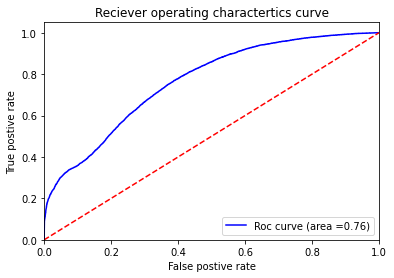

In [194]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1,tpr1,color ='blue', label = 'Roc curve (area =%0.2f)' % roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.title('Reciever operating charactertics curve')
plt.legend(loc='lower right')
plt.show()

In [199]:
# roc curve for testing data
Log_roc_auc2 = roc_auc_score(y_test,y_predict)
fpr2,tpr2,theresold = roc_curve(y_test,y_prob_test)
roc_auc2 = auc(fpr1,tpr1)

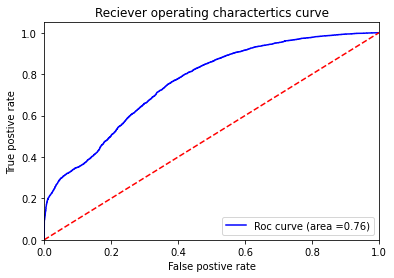

In [200]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1,tpr1,color ='blue', label = 'Roc curve (area =%0.2f)' % roc_auc2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.title('Reciever operating charactertics curve')
plt.legend(loc='lower right')
plt.show()

In [204]:
# random forest model 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [208]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)

# train random forest model

model1 = RandomForestClassifier(n_estimators =500 , max_depth =6)
model1.fit(x_train,y_train)


<ipython-input-208-7000d6b5aefa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, n_estimators=500)

In [213]:
y_predict = model1.predict(x_test)

In [211]:
from sklearn.metrics import confusion_matrix

In [214]:
confusion_matrix(y_test,y_predict)

array([[7107,  310],
       [1132, 1220]], dtype=int64)

In [215]:
from sklearn.metrics import classification_report

In [216]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7417
           1       0.80      0.52      0.63      2352

    accuracy                           0.85      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769



In [217]:
score = accuracy_score(y_test,y_predict)

In [218]:
score

0.8523902139420616

In [232]:
# roc curve 
y_prob_test = model1.predict_proba(x_test)

In [239]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
Lag_roc_auc = roc_auc_score(y_test,y_predict)

fpr,tpr,thereshold = roc_curve(y_test,y_prob_test[:,1])
auc1 = auc(fpr,tpr)

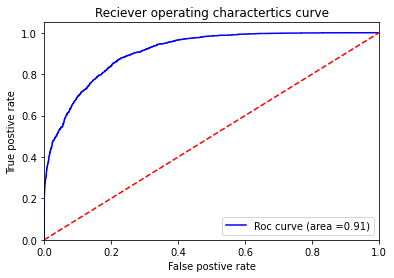

In [241]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color ='blue', label = 'Roc curve (area =%0.2f)' % auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.title('Reciever operating charactertics curve')
plt.legend(loc='lower right')
plt.show()